In [6]:
import pandas as pd
import numpy as np
import random
import string
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
cmd_hometest = pd.read_excel('child_mortality_data_homework.xlsx')
cmd_hometest

,Country,Region,Mortality Rate (per 1000 live births),Healthcare Spending (USD),Access to Clean Water (%)
0,Country A,Region 3,64.0,3423,60
1,Country B,Region 4,20.6,2714,76
2,Country C,Region 1,14.4,4686,44
3,Country D,Region 3,36.8,1213,58
4,Country E,Region 3,69.1,4102,98
...,...,...,...,...,...
295,Country Å¨,Region 4,66.6,4143,86
296,Country Å©,Region 2,69.1,4350,47
297,Country Åª,Region 3,54.0,1372,73
298,Country Å«,Region 1,29.5,1752,74


In [10]:
cmd_hometest.head()
cmd_hometest.info()
cmd_hometest.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                300 non-null    object 
 1   Region                                 300 non-null    object 
 2   Mortality Rate (per 1000 live births)  300 non-null    float64
 3   Healthcare Spending (USD)              300 non-null    int64  
 4   Access to Clean Water (%)              300 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


Country                                  0
Region                                   0
Mortality Rate (per 1000 live births)    0
Healthcare Spending (USD)                0
Access to Clean Water (%)                0
dtype: int64

In [12]:
Region = ['Region 1','Region 2','Region 3','Region 4']
Mortality_rate = ['20','40','60','80','100']

<function matplotlib.pyplot.show(close=None, block=None)>

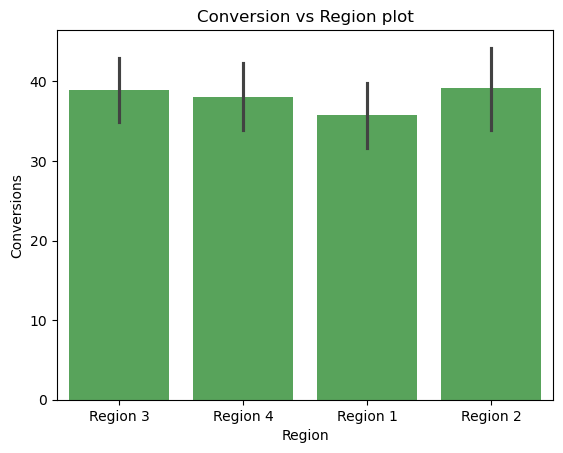

In [14]:
sns.barplot(data=cmd_hometest, x='Region', y='Mortality Rate (per 1000 live births)', color='#4CAF50')
plt.title('Conversion vs Region plot')
plt.xlabel('Region')
plt.ylabel('Conversions')
plt.show

C:\Users\Claudia\AppData\Local\Temp\ipykernel_9912\2979432663.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=cmd_hometest, x='Healthcare Spending (USD)', y='Mortality Rate (per 1000 live births)', palette='rocket',)


<function matplotlib.pyplot.show(close=None, block=None)>

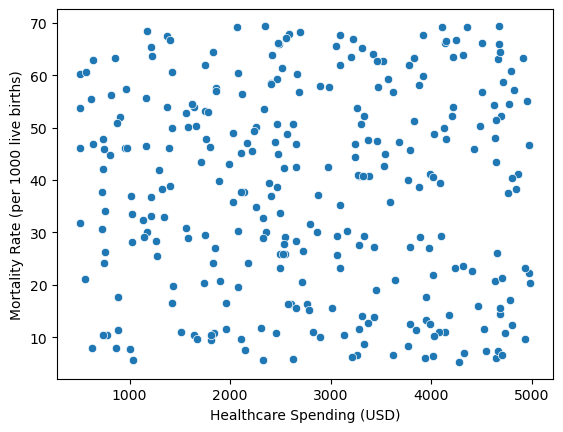

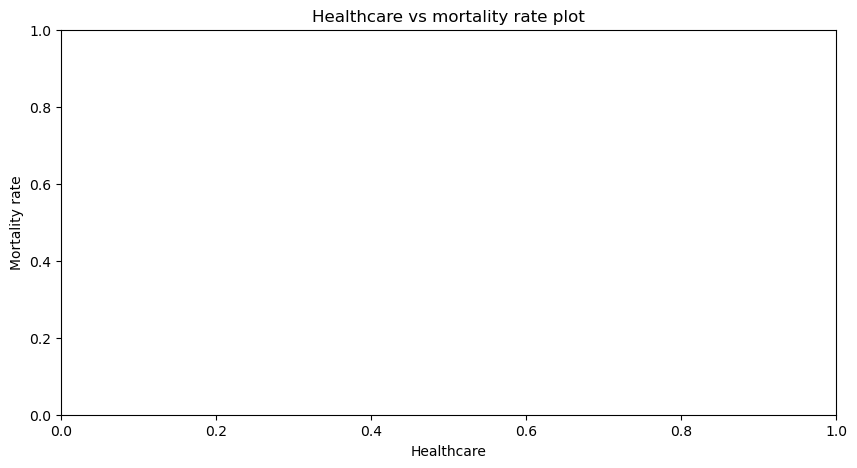

In [16]:
sns.scatterplot(data=cmd_hometest, x='Healthcare Spending (USD)', y='Mortality Rate (per 1000 live births)', palette='rocket',)
plt.figure(figsize=(10,5))
plt.title('Healthcare vs mortality rate plot')
plt.xlabel('Healthcare')
plt.ylabel('Mortality rate')
plt.show

In [24]:
import scipy.stats as stats
import scipy.stats as pearsonr
import scipy.stats as spearmanr

# T test

the null hypothesis states that the child mortality rate in region 1 and region 3 have no significant difference

while the alternative hypothesis states that child mortality rate in region 1 and region 3 have a significant difference

In [26]:
region_1=cmd_hometest[cmd_hometest['Region']=='Region 1']['Mortality Rate (per 1000 live births)']
region_3=cmd_hometest[cmd_hometest['Region']=='Region 2']['Mortality Rate (per 1000 live births)']

In [28]:
t_stat, p_value=stats.ttest_ind(region_1,region_3)
t_stat, p_value

(-1.0610175035998146, 0.2905089016734515)

## interpretation

The t-test comparing child mortality rates between Region 1 and Region 3 yields a t-statistic of -1.061 and a p-value of 0.291. 
Since the p-value is greater than the common significance level of 0.05, we fail to reject the null hypothesis. 
This indicates that there is no statistically significant difference in child mortality rates between Region 1 and Region 3 based on the available data.


In [43]:
cmd_hometest['boo_Mortality Rate (per 1000 live births)']=cmd_hometest['Mortality Rate (per 1000 live births)']>cmd_hometest['Mortality Rate (per 1000 live births)'].median()
cmd_hometest

,Country,Region,Mortality Rate (per 1000 live births),Healthcare Spending (USD),Access to Clean Water (%),boo_Mortality Rate (per 1000 live births)
0,Country A,Region 3,64.0,3423,60,True
1,Country B,Region 4,20.6,2714,76,False
2,Country C,Region 1,14.4,4686,44,False
3,Country D,Region 3,36.8,1213,58,False
4,Country E,Region 3,69.1,4102,98,True
...,...,...,...,...,...,...
295,Country Å¨,Region 4,66.6,4143,86,True
296,Country Å©,Region 2,69.1,4350,47,True
297,Country Åª,Region 3,54.0,1372,73,True
298,Country Å«,Region 1,29.5,1752,74,False


## Chi Square

To find out if there is a relationship between regions and countries, and if child mortality rate 
in a country are above or below median null hypothesis we will perfom a chi square:

In [32]:
regcountry_mor_table= pd.crosstab(cmd_hometest['Country'], cmd_hometest['Mortality Rate (per 1000 live births)'])
regcountry_mor_table.head()

Mortality Rate (per 1000 live births),5.3,5.6,5.7,5.9,6.0,6.1,6.2,6.5,6.6,6.7,...,66.8,67.0,67.1,67.5,67.6,67.8,68.2,68.4,69.1,69.4
Country,,,,,,,,,,,,,,,,,,,,,
Country A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Country B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Country C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Country D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Country E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
chi2_stat, p, dof, expected= stats.chi2_contingency(regcountry_mor_table)
chi2_stat, p, dof, expected

(69599.99999999999,
 0.26632674604733814,
 69368,
 array([[0.00333333, 0.00333333, 0.00333333, ..., 0.00333333, 0.01      ,
         0.00666667],
        [0.00333333, 0.00333333, 0.00333333, ..., 0.00333333, 0.01      ,
         0.00666667],
        [0.00333333, 0.00333333, 0.00333333, ..., 0.00333333, 0.01      ,
         0.00666667],
        ...,
        [0.00333333, 0.00333333, 0.00333333, ..., 0.00333333, 0.01      ,
         0.00666667],
        [0.00333333, 0.00333333, 0.00333333, ..., 0.00333333, 0.01      ,
         0.00666667],
        [0.00333333, 0.00333333, 0.00333333, ..., 0.00333333, 0.01      ,
         0.00666667]]))

The null hypothesis states that there is a significant relation between countries and child mortality rate


The resulting p-value of 0.2 is greater than the significance threshold of 0.05. 
As a result, we fail to reject the null hypothesis, indicating that there is no statistically significant association between countries and 
child mortality rates based on the data provided. This suggests that child mortality rates may not vary significantly across countries in this dataset.

In [57]:
regcountry_mor_table2= pd.crosstab(cmd_hometest['Region'], cmd_hometest['boo_Mortality Rate (per 1000 live births)'])
regcountry_mor_table2

boo_Mortality Rate (per 1000 live births),False,True
Region,,
Region 1,39,35
Region 2,33,35
Region 3,37,40
Region 4,41,40


In [61]:
chi2_stat, p, dof, expected= stats.chi2_contingency(regcountry_mor_table2)
chi2_stat, p, dof, expected

(0.4042685415234435,
 0.9393593093301577,
 3,
 array([[37. , 37. ],
        [34. , 34. ],
        [38.5, 38.5],
        [40.5, 40.5]]))

## Interpretation
the null hypothesis states that there is a significant relationship between regions and child mortality rate

The chi-square test was used to check if there's a relationship between regions and child mortality rates. 
The p-value of 0.939 is much greater than 0.05, so we fail to reject the null hypothesis. 
This means there is no significant link between regions and child mortality rates; the observed differences likely occurred by chance.

## ANOVA

here the null hypothesis shows that there is a significant difference between the mean with at least one region and child mortality rate

In [65]:
region_1_mr=cmd_hometest[cmd_hometest['Region']=='Region 1']['Mortality Rate (per 1000 live births)']
region_2_mr=cmd_hometest[cmd_hometest['Region']=='Region 2']['Mortality Rate (per 1000 live births)']
region_3_mr=cmd_hometest[cmd_hometest['Region']=='Region 3']['Mortality Rate (per 1000 live births)']
region_4_mr=cmd_hometest[cmd_hometest['Region']=='Region 4']['Mortality Rate (per 1000 live births)']

In [67]:
f_stat,p_value=stats.f_oneway(region_1_mr,region_2_mr,region_3_mr,region_4_mr)
f_stat,p_value

(0.48888577081013473, 0.6902549035098264)

## Interpretation

The ANOVA test shows no significant difference in child mortality rates between the regions. 
With an F-statistic of 0.489 and a p-value of 0.690, which is greater than 0.05, we fail to reject the 
null hypothesis. This suggests that the variations in mortality rates are not statistically significant across the regions, 
meaning the regions likely have similar child mortality rates.


## Correlation


## Pearson correlation

In [74]:
correlation, p_value= stats.pearsonr(cmd_hometest['Healthcare Spending (USD)'], cmd_hometest['Mortality Rate (per 1000 live births)'])
correlation, p_value

(-0.03441350913525526, 0.552681337523697)

## Interpretation

The Pearson correlation coefficient between healthcare spending (USD) and mortality rate (per 1000 live births) is -0.034, 
indicating a very weak negative relationship. The p-value of 0.553 is greater than 0.05, which means the correlation is not statistically significant. 
This suggests that there is no meaningful relationship between healthcare spending and child mortality rate in this dataset.

## Spearman correlation

In [77]:
correlation, p_value= stats.spearmanr(cmd_hometest['Healthcare Spending (USD)'], cmd_hometest['Mortality Rate (per 1000 live births)'])
correlation, p_value

(-0.027124530837328457, 0.6398307454535692)